In [1]:
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
import yfinance as yf
from tqdm.notebook import trange, tqdm

/tmp/ipykernel_247141/3472911437.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [2]:
crypto = "BTC-USD"
ticker = yf.Ticker(crypto)
data = ticker.history(start="2017-11-09", end="2022-06-15", interval="1d")

In [3]:
data['Close']

Date
2017-11-09     7143.580078
2017-11-10     6618.140137
2017-11-11     6357.600098
2017-11-12     5950.069824
2017-11-13     6559.490234
                  ...     
2022-06-11    28360.810547
2022-06-12    26762.648438
2022-06-13    22487.388672
2022-06-14    22206.792969
2022-06-15    20952.580078
Name: Close, Length: 1680, dtype: float64

In [4]:

X = data['Close'].values

size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()

print (size, len(X), len(history), len(train), len(test))


1108 1680 1108 1108 572


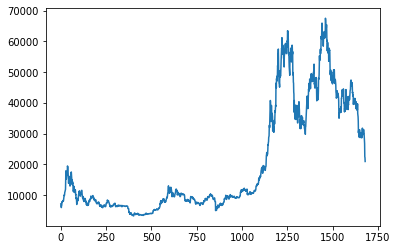

In [5]:
pyplot.plot(X)
pyplot.show()


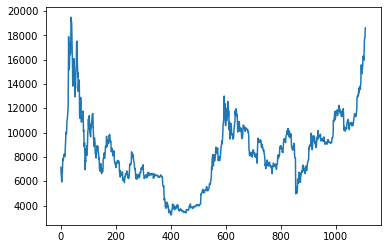

In [6]:
pyplot.plot(history)
pyplot.show()

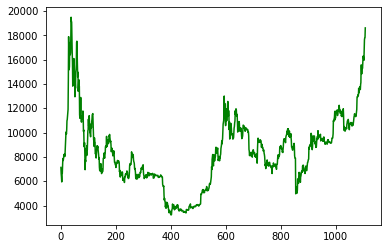

In [7]:
pyplot.plot(train, color="green")
pyplot.show()

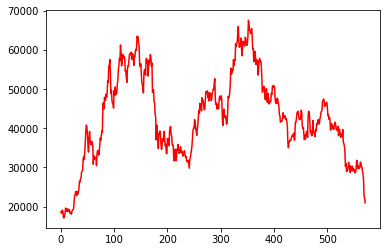

In [8]:
pyplot.plot(test, color="red")
pyplot.show()

In [9]:

# walk-forward validation
n = len(test)
with tqdm(total=n) as pbar:
	for t in range(n):
		model = ARIMA(history, order=(5,1,0))
		model_fit = model.fit()
		output = model_fit.forecast()
		yhat = output[0]
		predictions.append(yhat)
		obs = test[t]
		history.append(obs)
		pbar.write(f't={t} predicted={yhat}, expected={obs}')
		pbar.update(1)

  0%|          | 0/572 [00:00<?, ?it/s]

t=0 predicted=18686.21507285572, expected=18642.232421875
t=1 predicted=18715.581097868082, expected=18370.001953125
t=2 predicted=18372.77619484235, expected=18364.12109375
t=3 predicted=18353.53322322743, expected=19107.46484375
t=4 predicted=19193.355765606495, expected=18732.12109375
t=5 predicted=18722.82232241454, expected=17150.623046875
t=6 predicted=17100.448217103938, expected=17108.40234375
t=7 predicted=17131.081933700032, expected=17717.4140625
t=8 predicted=17810.560464246268, expected=18177.484375
t=9 predicted=18156.429501245068, expected=19625.8359375
t=10 predicted=19508.444208171684, expected=18802.998046875
t=11 predicted=18733.241347737916, expected=19201.091796875
t=12 predicted=19248.920664269954, expected=19445.3984375
t=13 predicted=19461.99826217935, expected=18699.765625
t=14 predicted=18833.53821761201, expected=19154.23046875
t=15 predicted=19086.127070777336, expected=19345.12109375
t=16 predicted=19372.598001188846, expected=19191.630859375
t=17 predicted

In [10]:

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 1717.545


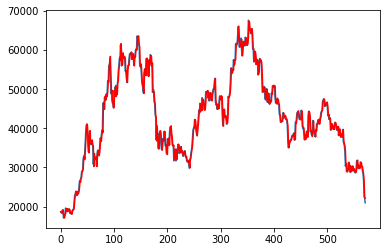

In [11]:

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

